In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from matplotlib.ticker import MultipleLocator
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
games_file_path = '/content/drive/MyDrive/games.csv'
games_df = pd.read_csv(games_file_path)

games_details_file_path = '/content/drive/MyDrive/games_details.csv'
games_details_df = pd.read_csv(games_details_file_path)

<ipython-input-6-472711a40cbe>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv(games_details_file_path)


In [ ]:
games_details_df.head(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


### Date Preprocessing

In [ ]:
def get_info(dataset):
  # information
  print('dataset information: \n')
  print(dataset.info())
  # description of numerical columns
  print('\n dataset description: \n')
  print(dataset.describe())

Dataset  link:
https://www.kaggle.com/datasets/nathanlauga/nba-games

In [ ]:
def get_missing_values(dataset):
  # creating table of num of null values in each feature and it's percentage out of the feature
  Sum = dataset.isnull().sum()
  Percentage = (dataset.isnull().sum()/dataset.isnull().count())
  missing_values_table = pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])
  return missing_values_table
# removing missing values
def remove_nulls(dataset):
  missing_values_table = get_missing_values(dataset)
  # if there are missing values -> remove them
  if sum(missing_values_table["Sum"]) > 0:
    dataset = dataset.dropna(axis=0)
    return dataset

Games DF

In [ ]:
games_df.head(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [ ]:
get_info(games_df)

dataset information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away      

In [ ]:
get_missing_values(games_df)

,Sum,Percentage
GAME_DATE_EST,0,0.000000
GAME_ID,0,0.000000
GAME_STATUS_TEXT,0,0.000000
HOME_TEAM_ID,0,0.000000
VISITOR_TEAM_ID,0,0.000000
SEASON,0,0.000000
TEAM_ID_home,0,0.000000
PTS_home,99,0.003715
FG_PCT_home,99,0.003715
FT_PCT_home,99,0.003715


In [ ]:
remove_nulls(games_df)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [ ]:
games_details_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [ ]:
get_info(games_details_df)

dataset information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 no

In [ ]:
get_missing_values(games_details_df)

,Sum,Percentage
GAME_ID,0,0.000000
TEAM_ID,0,0.000000
TEAM_ABBREVIATION,0,0.000000
TEAM_CITY,0,0.000000
PLAYER_ID,0,0.000000
PLAYER_NAME,0,0.000000
NICKNAME,615591,0.920678
START_POSITION,412863,0.617478
COMMENT,558939,0.835949
MIN,109690,0.164052


In [ ]:
remove_nulls(games_details_df)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS


In [ ]:
data = pd.merge(games_details_df, games_df[['GAME_ID', 'GAME_DATE_EST']], how= 'right')

In [ ]:
data

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST
0,22200477,1.610613e+09,SAS,San Antonio,1629641.0,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022-12-22
1,22200477,1.610613e+09,SAS,San Antonio,1631110.0,Jeremy Sochan,Jeremy,F,NaN,31:01,...,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2022-12-22
2,22200477,1.610613e+09,SAS,San Antonio,1627751.0,Jakob Poeltl,Jakob,C,NaN,21:42,...,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022-12-22
3,22200477,1.610613e+09,SAS,San Antonio,1630170.0,Devin Vassell,Devin,G,NaN,30:20,...,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022-12-22
4,22200477,1.610613e+09,SAS,San Antonio,1630200.0,Tre Jones,Tre,G,NaN,27:44,...,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669654,11400001,1.610613e+09,MIA,Miami,203958.0,Andre Dawkins,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-04
669655,11400001,1.610613e+09,MIA,Miami,203120.0,Justin Hamilton,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-04
669656,11400001,1.610613e+09,MIA,Miami,204020.0,Tyler Johnson,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-04
669657,11400001,1.610613e+09,MIA,Miami,201177.0,Josh McRoberts,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-04


In [ ]:

def plot_player_performance(player_name, data, highlight_years=None):
    # Convert GAME_DATE to datetime and extract the year
    data['GAME_DATE_EST'] = pd.to_datetime(data['GAME_DATE_EST'])
    data['YEAR'] = data['GAME_DATE_EST'].dt.year

    # Filter the dataset for the selected player
    player_df = data[data['PLAYER_NAME'] == player_name]

    # Group by year to calculate the average statistics per year
    player_yearly_stats = player_df.groupby('YEAR')[['PTS', 'AST', 'REB', 'BLK', 'STL']].mean().reset_index()

    # Plot the player's performance over the years
    plt.figure(figsize=(12, 8))
    plt.plot(player_yearly_stats['YEAR'], player_yearly_stats['PTS'], label='Points')
    plt.plot(player_yearly_stats['YEAR'], player_yearly_stats['AST'], label='Assists')
    plt.plot(player_yearly_stats['YEAR'], player_yearly_stats['REB'], label='Rebounds')
    plt.plot(player_yearly_stats['YEAR'], player_yearly_stats['BLK'], label='Blocks')
    plt.plot(player_yearly_stats['YEAR'], player_yearly_stats['STL'], label='Steals')

    if highlight_years is not None:
        for year in highlight_years:
            plt.axvline(x=year, color='red', linestyle='--', label=f'Award Year: {year}')

    plt.xlabel('Year')
    plt.ylabel('Average Stats per Season')
    plt.title(f'Performance of {player_name} Over the Years')
    plt.legend()

    # Set x-axis ticks to integer years
    plt.gca().xaxis.set_major_locator(MultipleLocator(1))

    plt.show()

    # Analyze and conclude the advancement of the player
    print(f"Deeper Analysis of {player_name}'s Advancement:")
    print('-' * 50)
    print(f"{player_name}'s career highlights based on the data:")

    # Points Analysis
    max_points = player_yearly_stats['PTS'].max()
    max_points_year = player_yearly_stats.loc[player_yearly_stats['PTS'].idxmax(), 'YEAR']
    print(f"- Highest scoring year: {max_points_year} with an average of {max_points:.2f} points per game.")

    # Assists Analysis
    max_assists = player_yearly_stats['AST'].max()
    max_assists_year = player_yearly_stats.loc[player_yearly_stats['AST'].idxmax(), 'YEAR']
    print(f"- Best playmaking year: {max_assists_year} with an average of {max_assists:.2f} assists per game.")

    # Rebounds Analysis
    max_rebounds = player_yearly_stats['REB'].max()
    max_rebounds_year = player_yearly_stats.loc[player_yearly_stats['REB'].idxmax(), 'YEAR']
    print(f"- Strongest rebounding year: {max_rebounds_year} with an average of {max_rebounds:.2f} rebounds per game.")

    # Blocks Analysis
    max_blocks = player_yearly_stats['BLK'].max()
    max_blocks_year = player_yearly_stats.loc[player_yearly_stats['BLK'].idxmax(), 'YEAR']
    print(f"- Best defensive year (blocks): {max_blocks_year} with an average of {max_blocks:.2f} blocks per game.")

    # Steals Analysis
    max_steals = player_yearly_stats['STL'].max()
    max_steals_year = player_yearly_stats.loc[player_yearly_stats['STL'].idxmax(), 'YEAR']
    print(f"- Best defensive year (steals): {max_steals_year} with an average of {max_steals:.2f} steals per game.")

    # Overall Improvement
    initial_year = player_yearly_stats['YEAR'].min()
    final_year = player_yearly_stats['YEAR'].max()
    improvement_points = player_yearly_stats.loc[player_yearly_stats['YEAR'] == final_year, 'PTS'].values[0] - player_yearly_stats.loc[player_yearly_stats['YEAR'] == initial_year, 'PTS'].values[0]
    print(f"- Overall improvement in scoring from {initial_year} to {final_year}: {improvement_points:.2f} points per game.")

# Example usage:
# Assuming you have a DataFrame named 'data'
# plot_player_performance('LeBron James', data, highlight_years=[2022, 2024])

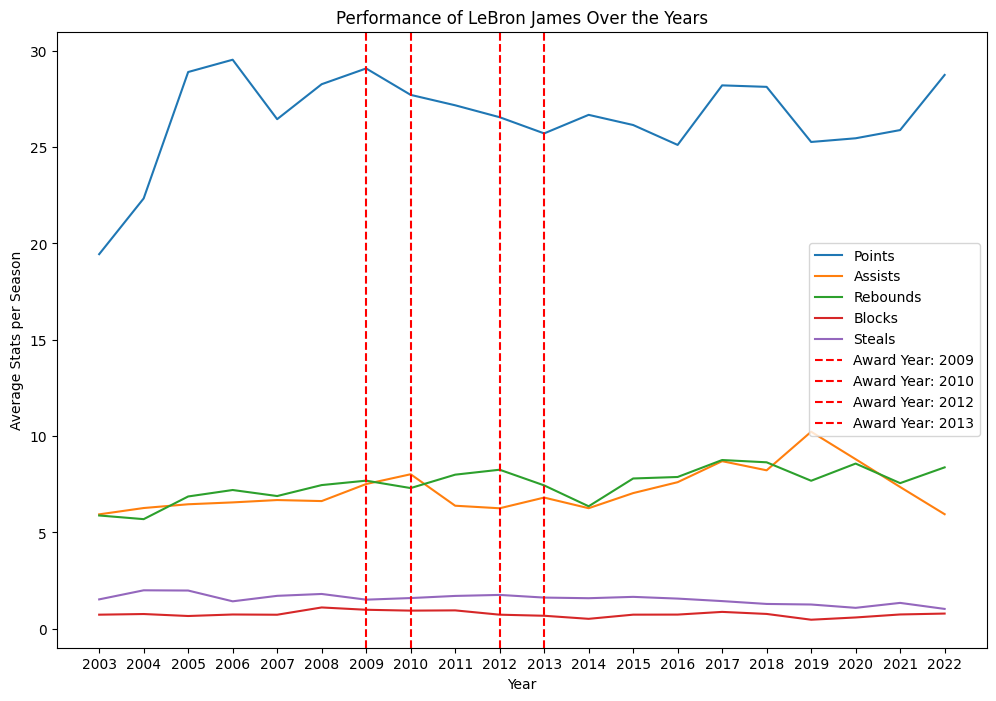

In [ ]:
plot_player_performance('LeBron James', data, [2009, 2010, 2012, 2013])

Deeper Analysis of LeBron James's Advancement:
--------------------------------------------------
LeBron James's career highlights based on the data:
- Highest scoring year: 2006 with an average of 29.53 points per game.
- Best playmaking year: 2019 with an average of 10.23 assists per game.
- Strongest rebounding year: 2017 with an average of 8.76 rebounds per game.
- Best defensive year (blocks): 2008 with an average of 1.11 blocks per game.
- Best defensive year (steals): 2004 with an average of 2.00 steals per game.
- Overall improvement in scoring from 2003 to 2022: 9.30 points per game.


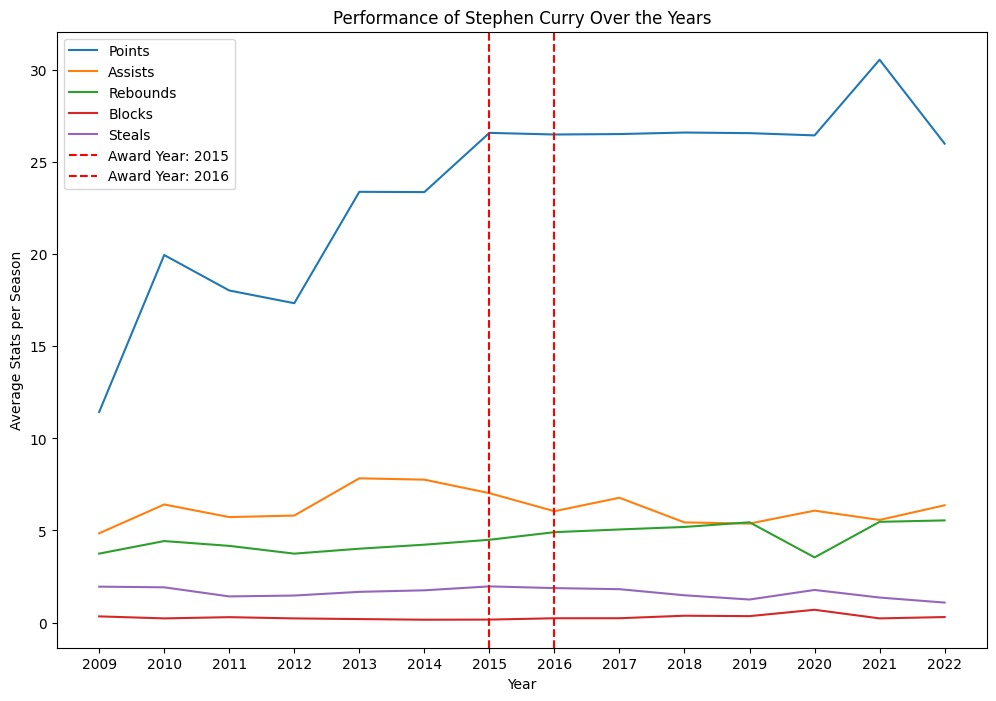

Deeper Analysis of Stephen Curry's Advancement:
--------------------------------------------------
Stephen Curry's career highlights based on the data:
- Highest scoring year: 2021 with an average of 30.57 points per game.
- Best playmaking year: 2013 with an average of 7.83 assists per game.
- Strongest rebounding year: 2022 with an average of 5.55 rebounds per game.
- Best defensive year (blocks): 2020 with an average of 0.69 blocks per game.
- Best defensive year (steals): 2015 with an average of 1.96 steals per game.
- Overall improvement in scoring from 2009 to 2022: 14.58 points per game.


In [ ]:
plot_player_performance('Stephen Curry', data, [2015, 2016])

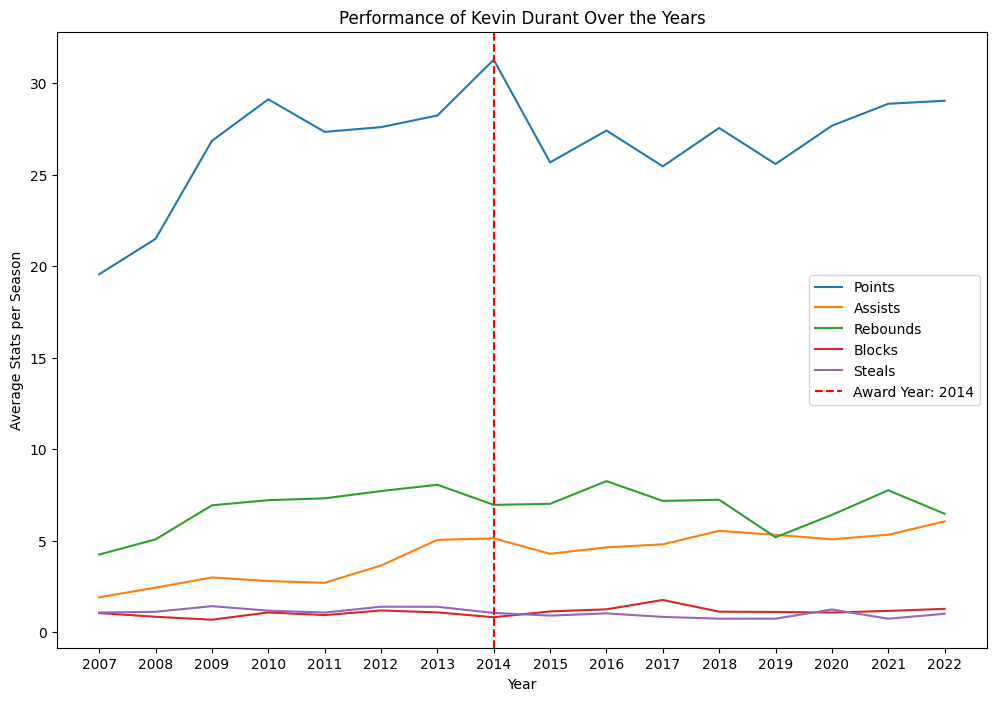

Deeper Analysis of Kevin Durant's Advancement:
--------------------------------------------------
Kevin Durant's career highlights based on the data:
- Highest scoring year: 2014 with an average of 31.27 points per game.
- Best playmaking year: 2022 with an average of 6.06 assists per game.
- Strongest rebounding year: 2016 with an average of 8.26 rebounds per game.
- Best defensive year (blocks): 2017 with an average of 1.77 blocks per game.
- Best defensive year (steals): 2009 with an average of 1.43 steals per game.
- Overall improvement in scoring from 2007 to 2022: 9.47 points per game.


In [ ]:
plot_player_performance('Kevin Durant', data, [2014])

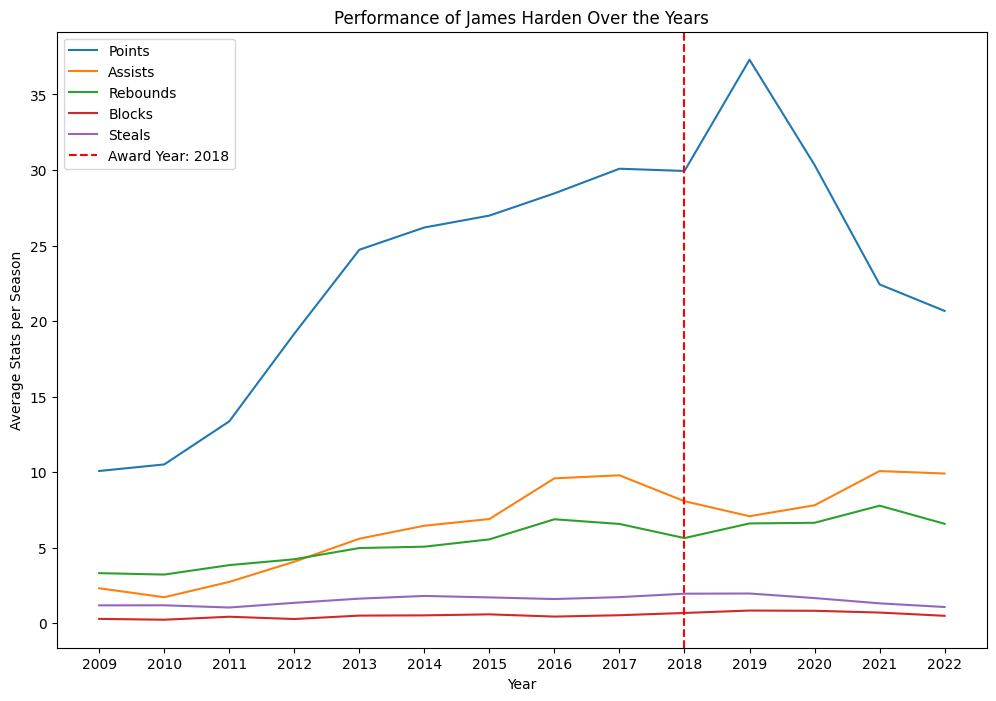

Deeper Analysis of James Harden's Advancement:
--------------------------------------------------
James Harden's career highlights based on the data:
- Highest scoring year: 2019 with an average of 37.30 points per game.
- Best playmaking year: 2021 with an average of 10.07 assists per game.
- Strongest rebounding year: 2021 with an average of 7.78 rebounds per game.
- Best defensive year (blocks): 2019 with an average of 0.84 blocks per game.
- Best defensive year (steals): 2019 with an average of 1.97 steals per game.
- Overall improvement in scoring from 2009 to 2022: 10.59 points per game.


In [ ]:
plot_player_performance('James Harden', data, [2018])

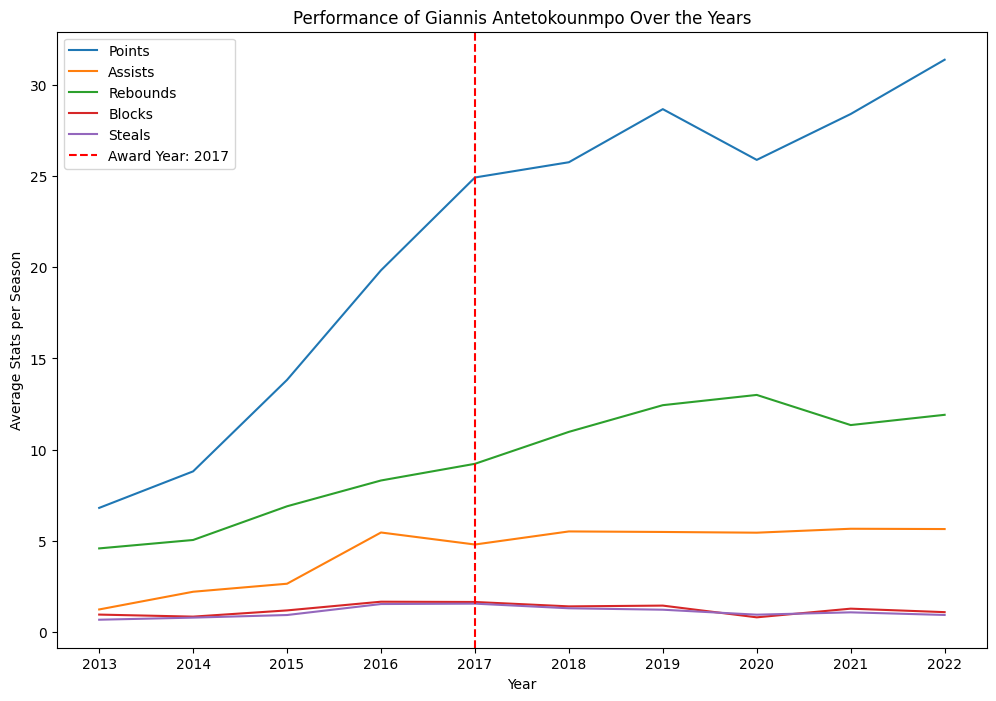

Deeper Analysis of Giannis Antetokounmpo's Advancement:
--------------------------------------------------
Giannis Antetokounmpo's career highlights based on the data:
- Highest scoring year: 2022 with an average of 31.36 points per game.
- Best playmaking year: 2021 with an average of 5.67 assists per game.
- Strongest rebounding year: 2020 with an average of 13.00 rebounds per game.
- Best defensive year (blocks): 2016 with an average of 1.67 blocks per game.
- Best defensive year (steals): 2017 with an average of 1.57 steals per game.
- Overall improvement in scoring from 2013 to 2022: 24.55 points per game.


In [ ]:
plot_player_performance('Giannis Antetokounmpo', data, [2017])


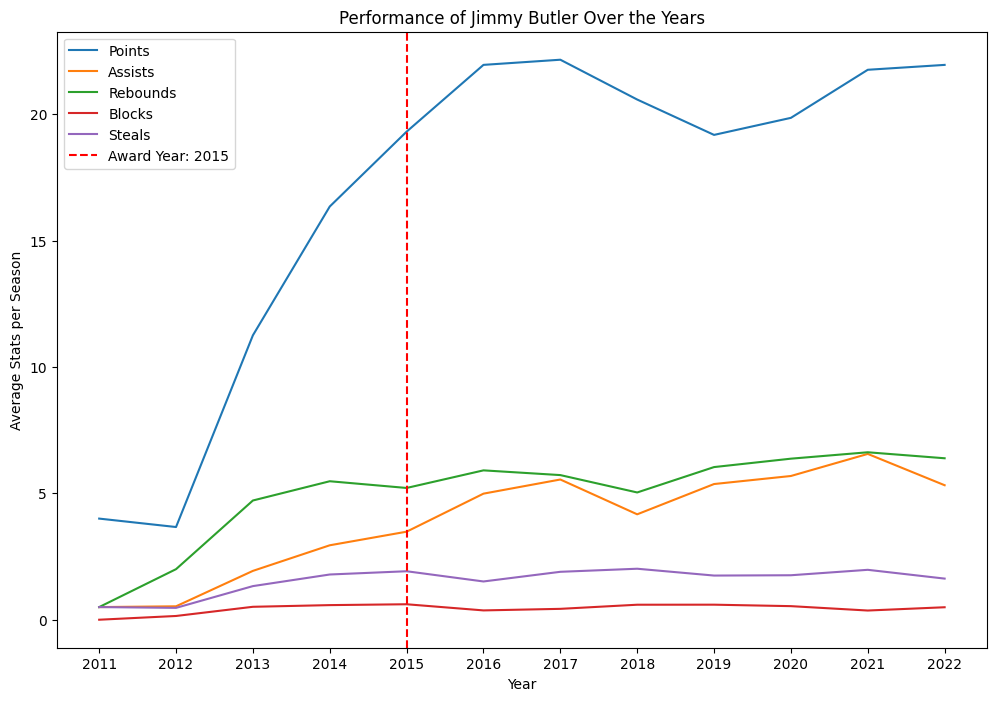

Deeper Analysis of Jimmy Butler's Advancement:
--------------------------------------------------
Jimmy Butler's career highlights based on the data:
- Highest scoring year: 2017 with an average of 22.15 points per game.
- Best playmaking year: 2021 with an average of 6.56 assists per game.
- Strongest rebounding year: 2021 with an average of 6.62 rebounds per game.
- Best defensive year (blocks): 2015 with an average of 0.61 blocks per game.
- Best defensive year (steals): 2018 with an average of 2.02 steals per game.
- Overall improvement in scoring from 2011 to 2022: 17.95 points per game.


In [ ]:
plot_player_performance('Jimmy Butler', data, [2015])


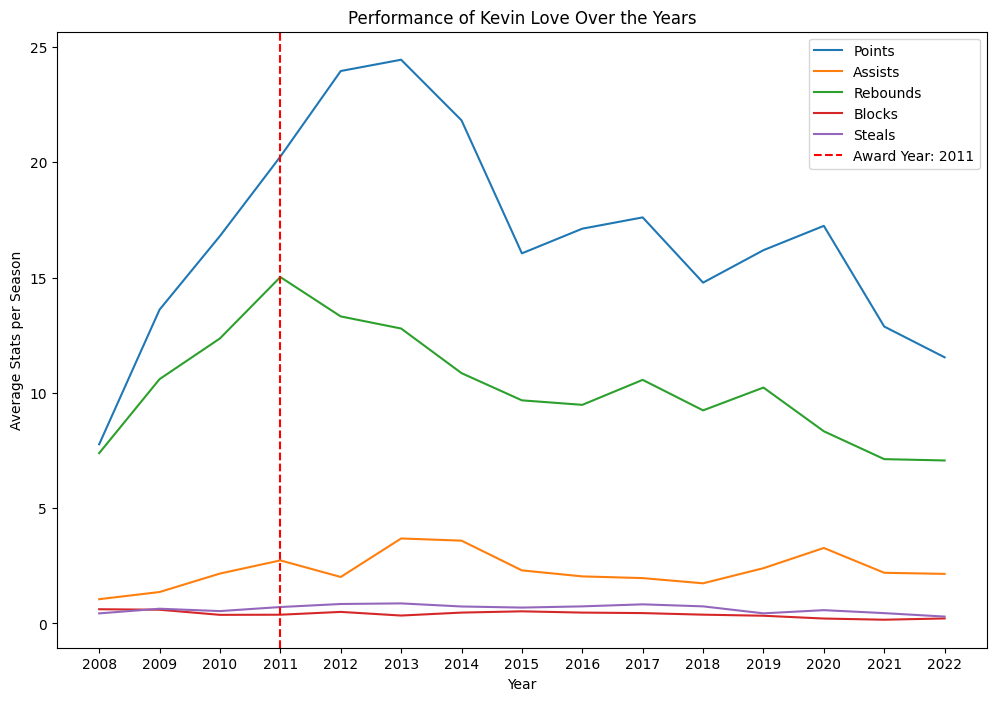

Deeper Analysis of Kevin Love's Advancement:
--------------------------------------------------
Kevin Love's career highlights based on the data:
- Highest scoring year: 2013 with an average of 24.45 points per game.
- Best playmaking year: 2013 with an average of 3.68 assists per game.
- Strongest rebounding year: 2011 with an average of 15.02 rebounds per game.
- Best defensive year (blocks): 2008 with an average of 0.62 blocks per game.
- Best defensive year (steals): 2013 with an average of 0.87 steals per game.
- Overall improvement in scoring from 2008 to 2022: 3.77 points per game.


In [ ]:
plot_player_performance('Kevin Love', data, [2011])


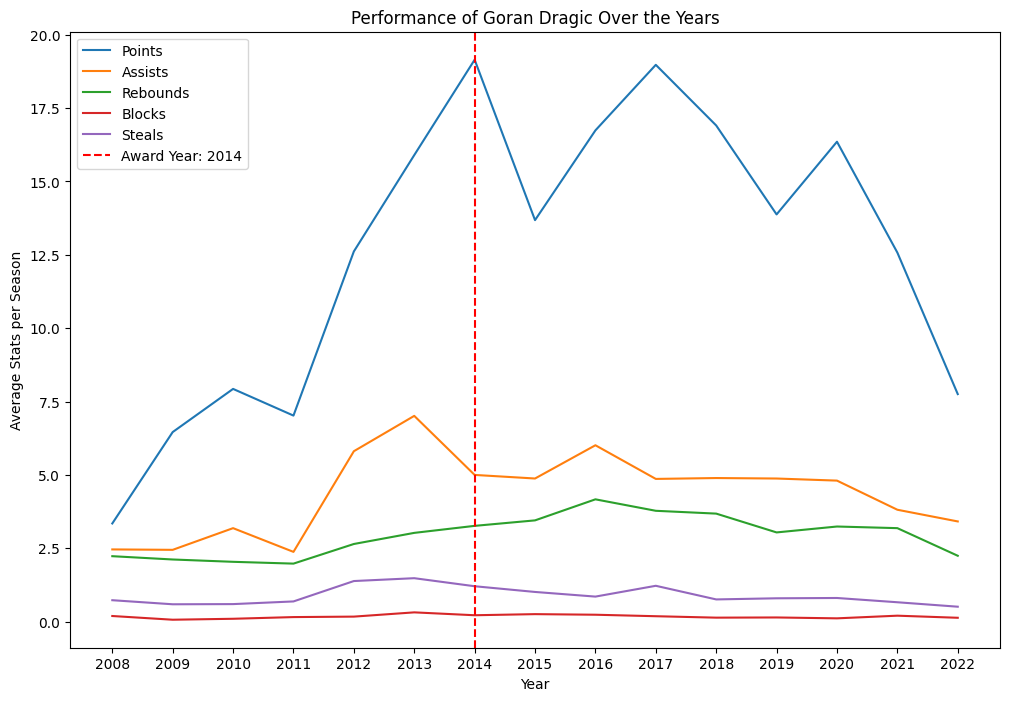

Deeper Analysis of Goran Dragic's Advancement:
--------------------------------------------------
Goran Dragic's career highlights based on the data:
- Highest scoring year: 2014 with an average of 19.15 points per game.
- Best playmaking year: 2013 with an average of 7.01 assists per game.
- Strongest rebounding year: 2016 with an average of 4.17 rebounds per game.
- Best defensive year (blocks): 2013 with an average of 0.32 blocks per game.
- Best defensive year (steals): 2013 with an average of 1.48 steals per game.
- Overall improvement in scoring from 2008 to 2022: 4.41 points per game.


In [ ]:
plot_player_performance('Goran Dragic', data, [2014])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
def get_player_stats_correlation(player_name, data):
    # Filter data for the given player
    player_data = data[data['PLAYER_NAME'] == player_name]

    # Select relevant statistics columns
    stats_columns = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
                     'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
                     'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']

    # Clean and prepare the 'MIN' column by converting it to total seconds
    player_data['MIN'] = player_data['MIN'].fillna('0:00')
    player_data['MIN'] = player_data['MIN'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if ':' in x else 0)

    # Drop rows where any stat is NaN
    stats_data = player_data[stats_columns].dropna()

    # Compute the correlation matrix
    correlation_matrix = stats_data.astype(float).corr()

    return correlation_matrix

def plot_correlation_matrix(correlation_matrix, player_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Matrix for {player_name}')
    plt.show()


<ipython-input-29-953a3217364a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['MIN'] = player_data['MIN'].fillna('0:00')
<ipython-input-29-953a3217364a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['MIN'] = player_data['MIN'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if ':' in x else 0)


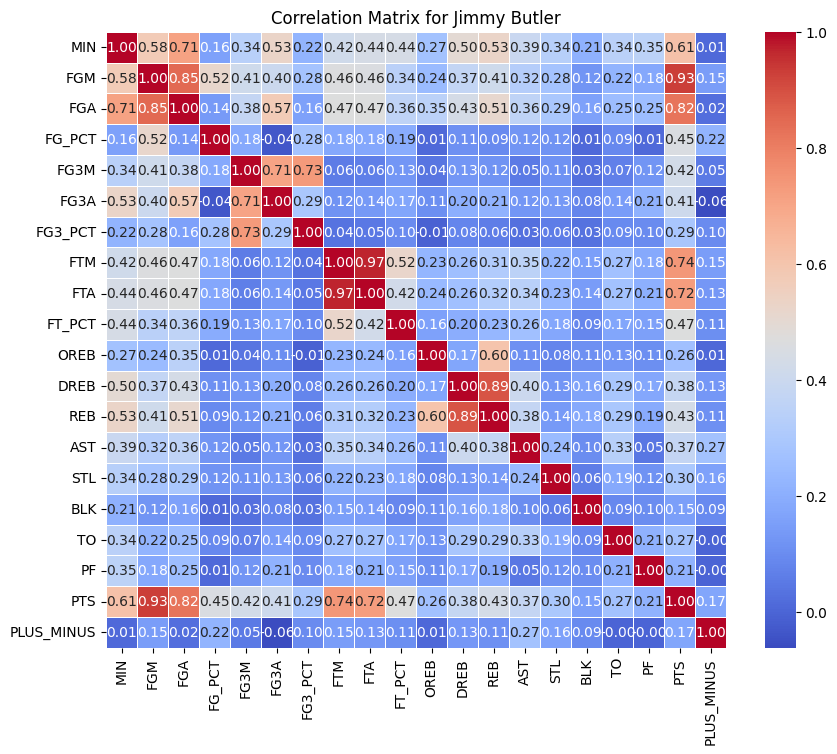

In [ ]:
player_name = "Jimmy Butler"
correlation_matrix = get_player_stats_correlation(player_name, data)
plot_correlation_matrix(correlation_matrix, player_name)

In [ ]:

# Load the original player data and the games data
data = pd.read_csv(games_details_file_path)
games_data = pd.read_csv(games_file_path)

# Merge the original player data with the games data to include the SEASON information
full_data = pd.merge(data, games_data[['GAME_ID', 'SEASON']], on='GAME_ID', how='left')

def get_seasonal_correlation(player_name, data):
    # Filter data for the given player
    player_data = data[data['PLAYER_NAME'] == player_name]

    # Convert 'MIN' from string to total seconds
    player_data['MIN'] = player_data['MIN'].fillna('0:00')
    player_data['MIN'] = player_data['MIN'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if ':' in x else 0)

    # Define stats columns and clean data
    stats_columns = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
                     'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
                     'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS', 'SEASON']
    player_data = player_data[stats_columns].dropna()

    # Group data by season and calculate correlation matrix for each season
    seasonal_correlations = {}
    for season, group in player_data.groupby('SEASON'):
        seasonal_correlations[season] = group.astype(float).corr()

    return seasonal_correlations

def plot_correlation_trends(seasonal_correlations, stat1, stat2):
    seasons = sorted(seasonal_correlations.keys())
    correlation_values = [seasonal_correlations[season].loc[stat1, stat2] for season in seasons if stat1 in seasonal_correlations[season].columns and stat2 in seasonal_correlations[season].columns]

    plt.figure(figsize=(10, 5))
    plt.plot(seasons, correlation_values, marker='o')
    plt.title(f'Correlation between {stat1} and {stat2} over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Correlation')
    plt.grid(True)
    plt.show()



<ipython-input-31-a1a0056c119f>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


<ipython-input-31-a1a0056c119f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['MIN'] = player_data['MIN'].fillna('0:00')
<ipython-input-31-a1a0056c119f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['MIN'] = player_data['MIN'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if ':' in x else 0)


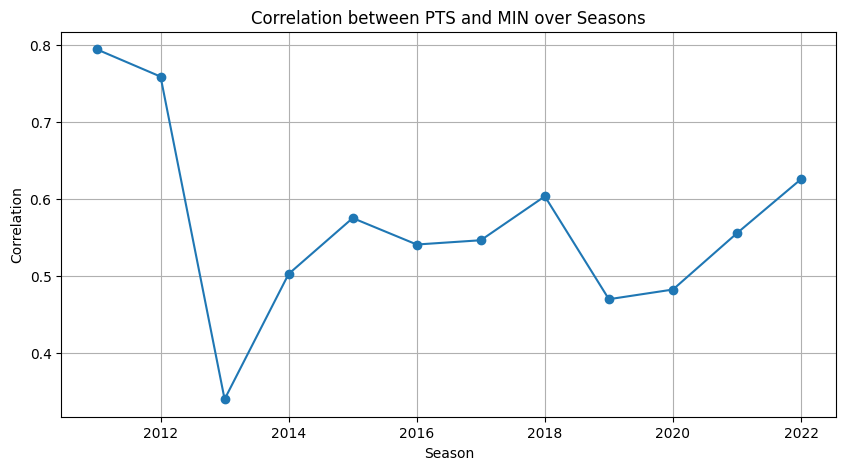

In [ ]:
seasonal_correlations = get_seasonal_correlation("Jimmy Butler", full_data)
plot_correlation_trends(seasonal_correlations, 'PTS', 'MIN')  # Example: Points and Assists

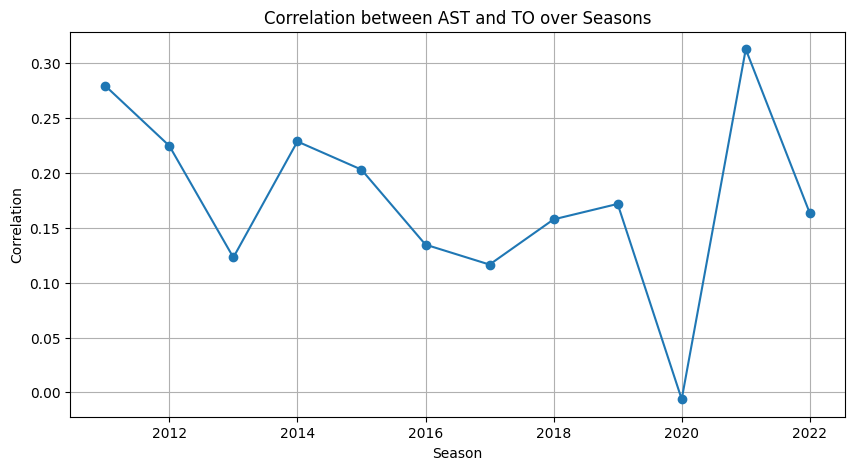

In [ ]:
plot_correlation_trends(seasonal_correlations, 'AST', 'TO')  # Example: Points and Assists

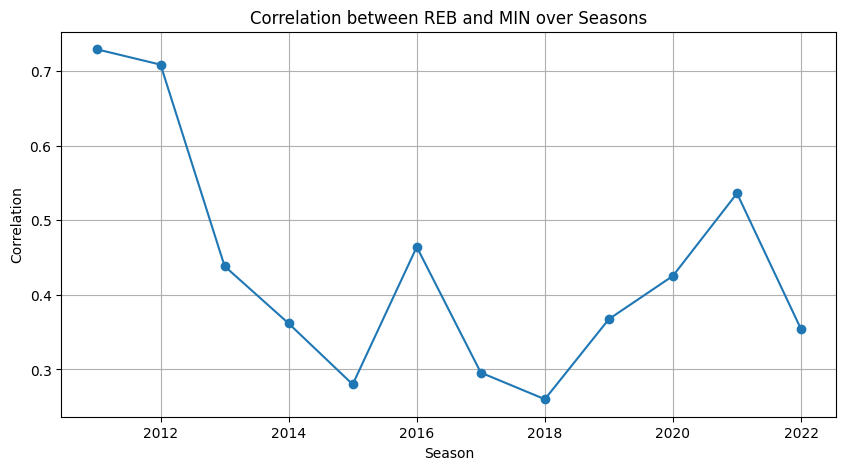

In [ ]:
plot_correlation_trends(seasonal_correlations, 'REB', 'MIN')  # Example: Points and Assists